In [40]:
# Define the directory where the data is located
directory = r'D:\OneDrive - University of Victoria\Research'

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.354.3.4278884073.448.1663697835.838.136
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.354
(0002, 0013) Implementation Version Name         SH: 'pet_odyssey.128'
(0002, 0016) Source Application Entity Title     AE: 'IQPETCT1'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 692
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20220920'
(0008, 0013) Instance Creation Time  

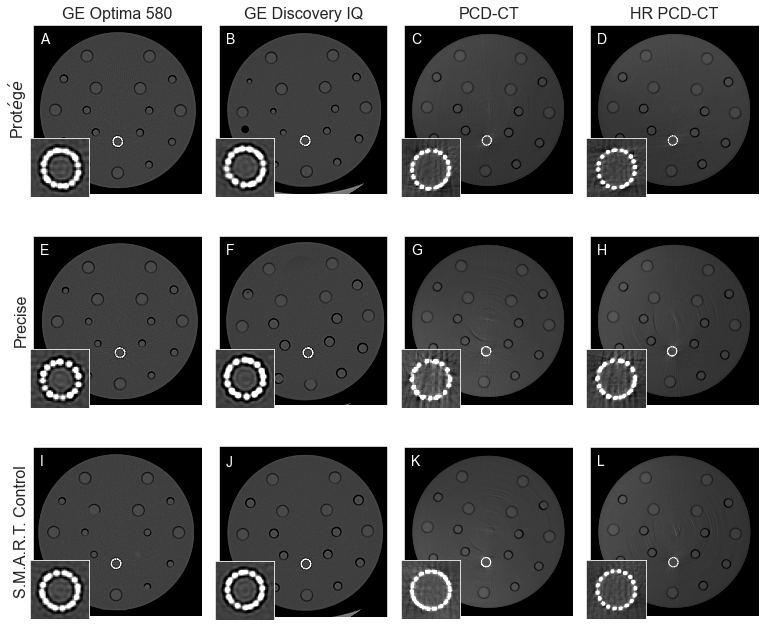

In [42]:
# Figure showing all CT images for all of the stents

import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
from natsort import natural_keys
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
initio_folder = '22_09_20_CT_stents'
clin_folder = '22_10_19_CT_stents'
clin_filter = 'boneplus'
pcd_folder = '22_10_11_CT_stents_heli'

append = ''

initio_path = os.path.join(directory, clin_dir, initio_folder, '10cm_phantom')
clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the high-res PCD data and select the correct bin and slice
red_pcd = np.load(os.path.join(pcd_path, 'red', 'Norm CT', 'CT_FDK_HR.npy'))[-1, 9]
purple_pcd = np.load(os.path.join(pcd_path, 'purple_mid', 'Norm CT', 'CT_FDK_HR.npy'))[-1, 11]
pink_pcd = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', 'CT_FDK_HR.npy'))[-1, 11]

# Grab the lower-res PCD data and select the correct bin and slice
red_pcd_low = np.load(os.path.join(pcd_path, 'red', 'Norm CT', 'CT_FDK.npy'))[-1, 3]
purple_pcd_low = np.load(os.path.join(pcd_path, 'purple_mid', 'Norm CT', 'CT_FDK.npy'))[-1, 4]
pink_pcd_low = np.load(os.path.join(pcd_path, 'pink_mid', 'Norm CT', 'CT_FDK.npy'))[-1, 4]

# Organize the clinical Initio files in numerical order
red_init_files = glob(os.path.join(initio_path, 'red', 'Data', '*.dcm'))
red_init_files.sort(key=natural_keys)
purple_init_files = glob(os.path.join(initio_path, 'purple', 'Data', '*.dcm'))
purple_init_files.sort(key=natural_keys)
pink_init_files = glob(os.path.join(initio_path, 'pink', 'Data', '*.dcm'))
pink_init_files.sort(key=natural_keys)

# Select the correct slice in the clinical data
red_init = pyd.dcmread(red_init_files[134])
purple_init = pyd.dcmread(purple_init_files[140])
pink_init = pyd.dcmread(pink_init_files[135])

print(pink_init)
print()
print()

red_init = np.array(red_init.pixel_array)[25:-30, 25:-30] * red_init.RescaleSlope + red_init.RescaleIntercept
purple_init = np.array(purple_init.pixel_array)[30:-30,
              30:-30] * purple_init.RescaleSlope + purple_init.RescaleIntercept
pink_init = np.array(pink_init.pixel_array)[35:-35, 45:-30] * pink_init.RescaleSlope + pink_init.RescaleIntercept

# Organize the clinical files in numerical order
red_clin_files = glob(os.path.join(clin_path, f'red_{clin_filter}', 'Data', '*.dcm'))
red_clin_files.sort(key=natural_keys)
purple_clin_files = glob(os.path.join(clin_path, f'purple_{clin_filter}', 'Data', '*.dcm'))
purple_clin_files.sort(key=natural_keys)
pink_clin_files = glob(os.path.join(clin_path, f'pink_{clin_filter}', 'Data', '*.dcm'))
pink_clin_files.sort(key=natural_keys)

# Select the correct slice in the clinical data
red_clin = pyd.dcmread(red_clin_files[85])
purple_clin = pyd.dcmread(purple_clin_files[85])
pink_clin = pyd.dcmread(pink_clin_files[86])

print(pink_clin)

# Get the pixel and zoom in on the phantom (with scaling)
red_clin = np.array(red_clin.pixel_array)[75:-75, 75:-75] * red_clin.RescaleSlope  + red_clin.RescaleIntercept
purple_clin = np.array(purple_clin.pixel_array)[75:-75, 75:-75] * purple_clin.RescaleSlope + purple_clin.RescaleIntercept
pink_clin = np.array(pink_clin.pixel_array)[75:-75, 75:-75] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept


# Set up the figure
ct_fig, ax = plt.subplots(3, 4, figsize=(13, 11))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[0, 3].set_xticks([])
ax[0, 3].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[1, 3].set_xticks([])
ax[1, 3].set_yticks([])
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([])
ax[2, 3].set_xticks([])
ax[2, 3].set_yticks([])
# ax[3, 0].set_xticks([])
# ax[3, 0].set_yticks([])
# ax[3, 1].set_xticks([])
# ax[3, 1].set_yticks([])
# ax[3, 2].set_xticks([])
# ax[3, 2].set_yticks([])

vmax = 1500
vmin = -600

im00 = ax[0, 0].imshow(red_clin, cmap='gray', vmin=vmin, vmax=vmax)

ax00 = inset_axes(ax[0, 0], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 0].transAxes, loc=3)
ax00.set_xticks([])
ax00.set_yticks([])
ax00.imshow(red_clin[232:266, 164:198], cmap='gray', vmin=vmin, vmax=vmax)


im01 = ax[1, 0].imshow(purple_clin, cmap='gray', vmin=vmin, vmax=vmax)
ax01 = inset_axes(ax[1, 0], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 0].transAxes, loc=3)
ax01.set_xticks([])
ax01.set_yticks([])
ax01.imshow(purple_clin[232:266, 169:203], cmap='gray', vmin=vmin, vmax=vmax)

im02 = ax[2, 0].imshow(pink_clin, cmap='gray', vmin=vmin, vmax=vmax)
ax02 = inset_axes(ax[2, 0], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[2, 0].transAxes, loc=3)
ax02.set_xticks([])
ax02.set_yticks([])
ax02.imshow(pink_clin[232:266, 161:195], cmap='gray', vmin=vmin, vmax=vmax)

im10 = ax[0, 1].imshow(red_init, cmap='gray', vmin=vmin, vmax=vmax)
ax10 = inset_axes(ax[0, 1], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 1].transAxes, loc=3)
ax10.set_xticks([])
ax10.set_yticks([])
ax10.imshow(red_init[292:334, 212:254], cmap='gray', vmin=vmin, vmax=vmax)

im11 = ax[1, 1].imshow(purple_init, cmap='gray', vmin=vmin, vmax=vmax)
ax11 = inset_axes(ax[1, 1], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 1].transAxes, loc=3)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.imshow(purple_init[291:333, 217:259], cmap='gray', vmin=vmin, vmax=vmax)

im12 = ax[2, 1].imshow(pink_init, cmap='gray', vmin=vmin, vmax=vmax)
ax12 = inset_axes(ax[2, 1], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[2, 1].transAxes, loc=3)
ax12.set_xticks([])
ax12.set_yticks([])
ax12.imshow(pink_init[284:326, 204:246], cmap='gray', vmin=vmin, vmax=vmax)

im20 = ax[0, 2].imshow(red_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax20 = inset_axes(ax[0, 2], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 2].transAxes, loc=3)
ax20.set_xticks([])
ax20.set_yticks([])
ax20.imshow(red_pcd_low[269:306, 189:226], cmap='gray', vmin=vmin, vmax=vmax)

im21 = ax[1, 2].imshow(purple_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax21 = inset_axes(ax[1, 2], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 2].transAxes, loc=3)
ax21.set_xticks([])
ax21.set_yticks([])
ax21.imshow(purple_pcd_low[269:306, 187:224], cmap='gray', vmin=vmin, vmax=vmax)

im22 = ax[2, 2].imshow(pink_pcd_low, cmap='gray', vmin=vmin, vmax=vmax)
ax22 = inset_axes(ax[2, 2], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[2, 2].transAxes, loc=3)
ax22.set_xticks([])
ax22.set_yticks([])
ax22.imshow(pink_pcd_low[269:306, 187:224], cmap='gray', vmin=vmin, vmax=vmax)

im30 = ax[0, 3].imshow(red_pcd, cmap='gray', vmin=vmin, vmax=vmax)
ax30 = inset_axes(ax[0, 3], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 3].transAxes, loc=3)
ax30.set_xticks([])
ax30.set_yticks([])
ax30.imshow(red_pcd[326:371, 228:273], cmap='gray', vmin=vmin, vmax=vmax)

im31 = ax[1, 3].imshow(purple_pcd, cmap='gray', vmin=vmin, vmax=vmax)
ax31 = inset_axes(ax[1, 3], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 3].transAxes, loc=3)
ax31.set_xticks([])
ax31.set_yticks([])
ax31.imshow(purple_pcd[326:371, 226:271], cmap='gray', vmin=vmin, vmax=vmax)


im32 = ax[2, 3].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax)
ax32 = inset_axes(ax[2, 3], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[2, 3].transAxes, loc=3)
ax32.set_xticks([])
ax32.set_yticks([])
ax32.imshow(pink_pcd[326:371, 230:275], cmap='gray', vmin=vmin, vmax=vmax)

ax[0, 0].set_ylabel(r'Prot$\acute{e}$g$\acute{e}$', fontsize=16)
ax[1, 0].set_ylabel('Precise', fontsize=16)
ax[2, 0].set_ylabel('S.M.A.R.T. Control', fontsize=16)

ax[0, 0].set_title('GE Optima 580', fontsize=16)
ax[0, 1].set_title('GE Discovery IQ', fontsize=16)
ax[0, 2].set_title('PCD-CT', fontsize=16)
ax[0, 3].set_title('HR PCD-CT', fontsize=16)

ax[0, 0].annotate('A', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[0, 2].annotate('C', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[0, 3].annotate('D', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('E', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('F', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[1, 2].annotate('G', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[1, 3].annotate('H', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[2, 0].annotate('I', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[2, 1].annotate('J', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[2, 2].annotate('K', (7, 150), xycoords='axes points', color='white', fontsize=14)
ax[2, 3].annotate('L', (7, 150), xycoords='axes points', color='white', fontsize=14)

plt.subplots_adjust(wspace=0.1)
ct_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\CT_fig_{clin_filter}.png', dpi=500)
# ct_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\CT_fig{append}.eps', dpi=500)'


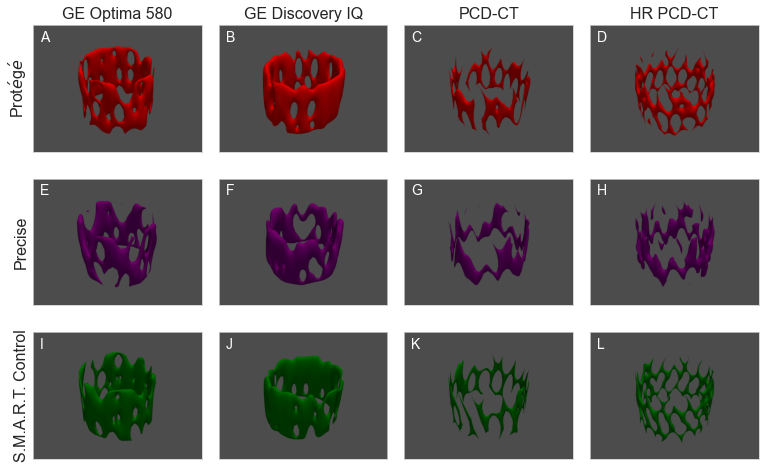

In [45]:

import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
import pyvista as pv

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
initio_folder = '22_09_20_CT_stents'
clin_folder = '22_10_19_CT_stents'
clin_filter = 'boneplus'
pcd_folder = '22_10_11_CT_stents_heli'

append = ''

initio_path = os.path.join(directory, clin_dir, initio_folder, '10cm_phantom')
clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the high_res PCD vtk stent data
red_pcd = pv.read(os.path.join(pcd_path, 'red', 'nrrd', 'stent_HR.vtk'))
purple_pcd = pv.read(os.path.join(pcd_path, 'purple_mid', 'nrrd', 'stent_HR.vtk'))
pink_pcd = pv.read(os.path.join(pcd_path, 'pink_mid', 'nrrd', 'stent_HR.vtk'))

# Grab the low_res PCD vtk stent data
red_pcd_low = pv.read(os.path.join(pcd_path, 'red', 'nrrd', 'stent.vtk'))
purple_pcd_low = pv.read(os.path.join(pcd_path, 'purple_mid', 'nrrd', 'stent.vtk'))
pink_pcd_low = pv.read(os.path.join(pcd_path, 'pink_mid', 'nrrd', 'stent.vtk'))

# Grab the initio vtk stent data
red_init = pv.read(os.path.join(initio_path, 'red', 'stent_1750.vtk'))
purple_init = pv.read(os.path.join(initio_path, 'purple', 'stent_1750.vtk'))
pink_init = pv.read(os.path.join(initio_path, 'pink', 'stent_1750.vtk'))

# Grab the BC Cancer vtk stent data
red_clin = pv.read(os.path.join(clin_path, f'red_{clin_filter}', 'stent_cut.vtk'))
purple_clin = pv.read(os.path.join(clin_path, f'purple_{clin_filter}', 'stent_cut.vtk'))
pink_clin = pv.read(os.path.join(clin_path, f'pink_{clin_filter}', 'stent_cut.vtk'))

# Set up the figure
fig_3d, ax = plt.subplots(3, 4, figsize=(13, 8))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])
ax[0, 3].set_xticks([])
ax[0, 3].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
ax[1, 3].set_xticks([])
ax[1, 3].set_yticks([])
ax[2, 0].set_xticks([])
ax[2, 0].set_yticks([])
ax[2, 1].set_xticks([])
ax[2, 1].set_yticks([])
ax[2, 2].set_xticks([])
ax[2, 2].set_yticks([])
ax[2, 3].set_xticks([])
ax[2, 3].set_yticks([])

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_clin, smooth_shading=True, color='red')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_clin, smooth_shading=True, color='purple')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_clin, smooth_shading=True, color='green')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 0].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_init, smooth_shading=True, color='red')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_init, smooth_shading=True, color='purple')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_init, smooth_shading=True, color='green')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 1].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_pcd_low, smooth_shading=True, color='red')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 2].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_pcd_low, smooth_shading=True, color='purple')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 2].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_pcd_low, smooth_shading=True, color='green')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 2].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(red_pcd, smooth_shading=True, color='red')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[0, 3].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(purple_pcd, smooth_shading=True, color='purple')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[1, 3].imshow(img)

pl = pv.Plotter(off_screen=True)
_ = pl.add_mesh(pink_pcd, smooth_shading=True, color='green')
img = pl.screenshot(None, return_img=True)
pl.close()

ax[2, 3].imshow(img)

ax[0, 0].set_ylabel(r'Prot$\acute{e}$g$\acute{e}$', fontsize=16)
ax[1, 0].set_ylabel('Precise', fontsize=16)
ax[2, 0].set_ylabel('S.M.A.R.T. Control', fontsize=16)

ax[0, 0].set_title('GE Optima 580', fontsize=16)
ax[0, 1].set_title('GE Discovery IQ', fontsize=16)
ax[0, 2].set_title('PCD-CT', fontsize=16)
ax[0, 3].set_title('HR PCD-CT', fontsize=16)

ax[0, 0].annotate('A', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[0, 2].annotate('C', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[0, 3].annotate('D', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('E', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('F', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[1, 2].annotate('G', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[1, 3].annotate('H', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[2, 0].annotate('I', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[2, 1].annotate('J', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[2, 2].annotate('K', (7, 110), xycoords='axes points', color='white', fontsize=14)
ax[2, 3].annotate('L', (7, 110), xycoords='axes points', color='white', fontsize=14)

plt.subplots_adjust(wspace=0.1)
fig_3d.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\3D_fig_{clin_filter}.png', dpi=500)
# fig_3d.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\3D_fig.eps', dpi=500)


c:\users\drich\anaconda3\envs\pcd_ct_recon\lib\site-packages\ipykernel_launcher.py:183: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
c:\users\drich\anaconda3\envs\pcd_ct_recon\lib\site-packages\ipykernel_launcher.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


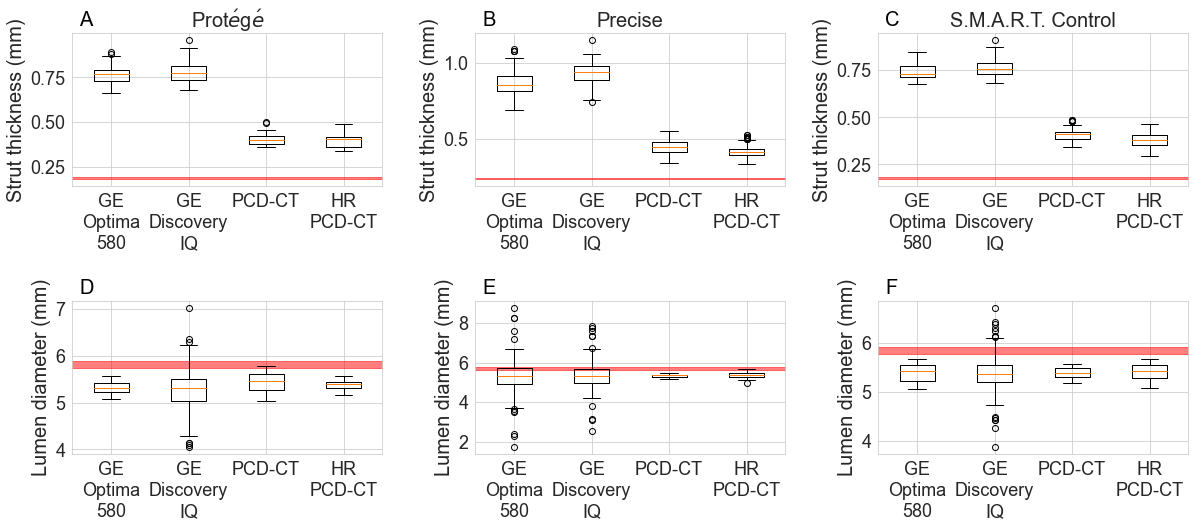

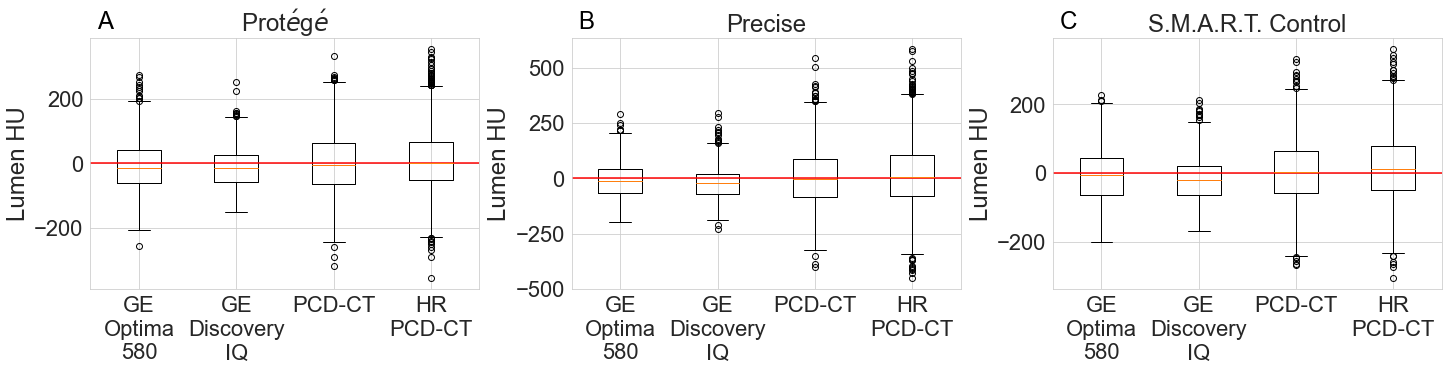

In [44]:
# This will look at the strut width, inner diameter, and inner HU value as box and whisker plots

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
initio_folder = '22_09_20_CT_stents'
clin_folder = '22_10_19_CT_stents'
clin_filter = 'boneplus'
pcd_folder = '22_10_11_CT_stents_heli'

# The PCD version of data to use
append_low = ''
append_high = '_HR'

# The type of analysis to use (whether the diameter and width were measured over the whole ring or just profiles on the wires)
type_anal = '_dots' # '_dots' or ''

# Load the appropriate data
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)
clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
initio_path = os.path.join(directory, clin_dir, initio_folder, '10cm_phantom')

# Load the BC Cancer data
red_bc_radii = np.load(os.path.join(clin_path, f'red_{clin_filter}', f'radii{type_anal}.npy')).flatten()
red_bc_width = np.load(os.path.join(clin_path, f'red_{clin_filter}', f'widths{type_anal}.npy')).flatten()
red_bc_hu_mean = np.load(os.path.join(clin_path, f'red_{clin_filter}', 'HU_pixels.npy')).flatten()
# red_bc_hu_var = np.load(os.path.join(clin_path, f'red_{clin_filter}', 'HU_variance.npy')).flatten()
purple_bc_radii = np.load(os.path.join(clin_path, f'purple_{clin_filter}', f'radii{type_anal}.npy')).flatten()
purple_bc_width = np.load(os.path.join(clin_path, f'purple_{clin_filter}', f'widths{type_anal}.npy')).flatten()
purple_bc_hu_mean = np.load(os.path.join(clin_path, f'purple_{clin_filter}', 'HU_pixels.npy')).flatten()
# purple_bc_hu_var = np.load(os.path.join(clin_path, f'purple_{clin_filter}', 'HU_variance.npy')).flatten()
pink_bc_radii = np.load(os.path.join(clin_path, f'pink_{clin_filter}', f'radii{type_anal}.npy')).flatten()
pink_bc_width = np.load(os.path.join(clin_path, f'pink_{clin_filter}', f'widths{type_anal}.npy')).flatten()
pink_bc_hu_mean = np.load(os.path.join(clin_path, f'pink_{clin_filter}', 'HU_pixels.npy')).flatten()
# pink_bc_hu_var = np.load(os.path.join(clin_path, f'pink_{clin_filter}', 'HU_variance.npy')).flatten()

# Load the Initio data
red_init_radii = np.load(os.path.join(initio_path, 'red', f'radii{type_anal}.npy')).flatten()
red_init_width = np.load(os.path.join(initio_path, 'red', f'widths{type_anal}.npy')).flatten()
red_init_hu_mean = np.load(os.path.join(initio_path, 'red', 'HU_pixels.npy')).flatten()
# red_init_hu_var = np.load(os.path.join(initio_path, 'red', 'HU_variance.npy')).flatten()
purple_init_radii = np.load(os.path.join(initio_path, 'purple', f'radii{type_anal}.npy')).flatten()
purple_init_width = np.load(os.path.join(initio_path, 'purple', f'widths{type_anal}.npy')).flatten()
purple_init_hu_mean = np.load(os.path.join(initio_path, 'purple', 'HU_pixels.npy')).flatten()
# purple_init_hu_var = np.load(os.path.join(initio_path, 'purple', 'HU_variance.npy')).flatten()
pink_init_radii = np.load(os.path.join(initio_path, 'pink', f'radii{type_anal}.npy')).flatten()
pink_init_width = np.load(os.path.join(initio_path, 'pink', f'widths{type_anal}.npy')).flatten()
pink_init_hu_mean = np.load(os.path.join(initio_path, 'pink', 'HU_pixels.npy')).flatten()
# pink_init_hu_var = np.load(os.path.join(initio_path, 'pink', 'HU_variance.npy')).flatten()

# Load the low res PCD data
red_low_radii = np.load(os.path.join(pcd_path, 'red', f'radii{type_anal}{append_low}.npy')).flatten()
red_low_width = np.load(os.path.join(pcd_path, 'red', f'widths{type_anal}{append_low}.npy')).flatten()
red_low_hu_mean = np.load(os.path.join(pcd_path, 'red', f'HU_pixels{append_low}.npy')).flatten()
# red_low_hu_var = np.load(os.path.join(pcd_path, 'red', f'HU_variance{append_low}.npy')).flatten()
purple_low_radii = np.load(os.path.join(pcd_path, 'purple_mid', f'radii{type_anal}{append_low}.npy')).flatten()
purple_low_width = np.load(os.path.join(pcd_path, 'purple_mid', f'widths{type_anal}{append_low}.npy')).flatten()
purple_low_hu_mean = np.load(os.path.join(pcd_path, 'purple_mid', f'HU_pixels{append_low}.npy')).flatten()
# purple_low_hu_var = np.load(os.path.join(pcd_path, 'purple_mid', f'HU_variance{append_low}.npy')).flatten()
pink_low_radii = np.load(os.path.join(pcd_path, 'pink_mid', f'radii{type_anal}{append_low}.npy')).flatten()
pink_low_width = np.load(os.path.join(pcd_path, 'pink_mid', f'widths{type_anal}{append_low}.npy')).flatten()
pink_low_hu_mean = np.load(os.path.join(pcd_path, 'pink_mid', f'HU_pixels{append_low}.npy')).flatten()
# pink_low_hu_var = np.load(os.path.join(pcd_path, 'pink_mid', f'HU_variance{append_low}.npy')).flatten()

# Load the high res PCD data
red_high_radii = np.load(os.path.join(pcd_path, 'red', f'radii{type_anal}{append_high}.npy')).flatten()
red_high_width = np.load(os.path.join(pcd_path, 'red', f'widths{type_anal}{append_high}.npy')).flatten()
red_high_hu_mean = np.load(os.path.join(pcd_path, 'red', f'HU_pixels{append_high}.npy')).flatten()
# red_high_hu_var = np.load(os.path.join(pcd_path, 'red', f'HU_variance{append_high}.npy')).flatten()
purple_high_radii = np.load(os.path.join(pcd_path, 'purple_mid', f'radii{type_anal}{append_high}.npy')).flatten()
purple_high_width = np.load(os.path.join(pcd_path, 'purple_mid', f'widths{type_anal}{append_high}.npy')).flatten()
purple_high_hu_mean = np.load(os.path.join(pcd_path, 'purple_mid', f'HU_pixels{append_high}.npy')).flatten()
# purple_high_hu_var = np.load(os.path.join(pcd_path, 'purple_mid', f'HU_variance{append_high}.npy')).flatten()
pink_high_radii = np.load(os.path.join(pcd_path, 'pink_mid', f'radii{type_anal}{append_high}.npy')).flatten()
pink_high_width = np.load(os.path.join(pcd_path, 'pink_mid', f'widths{type_anal}{append_high}.npy')).flatten()
pink_high_hu_mean = np.load(os.path.join(pcd_path, 'pink_mid', f'HU_pixels{append_high}.npy')).flatten()
# pink_high_hu_var = np.load(os.path.join(pcd_path, 'pink_mid', f'HU_variance{append_high}.npy')).flatten()

sns.set_style('whitegrid')


# Positions for the bars on the x-axis
# set width of bar
quant_fig, [[ax0, ax1, ax2], [ax3, ax4, ax5]] = plt.subplots(2, 3, figsize=(20, 9), constrained_layout=True)

# Order of the different styles
colors = sns.color_palette('colorblind', 5)
textures = ['', '//', '\\', '--', '\/']
labels = ['GE\nOptima\n580', 'GE\nDiscovery\nIQ', 'PCD-CT', 'HR\nPCD-CT']

# print(len(red_bc_width), len(red_init_width), len(red_low_width), len(red_high_width))

fnt_sz = 20
lbl_sz = 18

# Protege strut thickness
ax0.boxplot([red_bc_width, red_init_width, red_low_width, red_high_width])
ax0.set_title(r'Prot$\acute{e}$g$\acute{e}$', fontsize=fnt_sz)
ax0.set_ylabel('Strut thickness (mm)', fontsize=fnt_sz)
ax0.set_xticklabels(labels)
ax0.tick_params(labelsize=lbl_sz)
# ax0.set_ylim((0, 1.6))
ax0.set_xlim((0.5, 4.5))
ax0.fill_between(np.linspace(0, 5, 50), 0.181*np.ones(50), 0.191*np.ones(50), alpha=0.5, color='red')
# ax0.plot(np.linspace(0, 5, 50), 0.181*np.ones(50), color='red', ls=':')
# ax0.plot(np.linspace(0, 5, 50), 0.191*np.ones(50), color='red', ls='--')

# Precise strut thickness
ax1.boxplot([purple_bc_width, purple_init_width, purple_low_width, purple_high_width])
ax1.set_title('Precise', fontsize=fnt_sz)
ax1.set_ylabel('Strut thickness (mm)', fontsize=fnt_sz)
ax1.set_xticklabels(labels)
ax1.tick_params(labelsize=lbl_sz)
# ax1.set_ylim((0, 1.6))
ax1.set_xlim((0.5, 4.5))
ax1.fill_between(np.linspace(0, 5, 50), 0.233*np.ones(50), 0.243*np.ones(50), alpha=0.5, color='red')
# ax1.plot(np.linspace(0, 5, 50), 0.233*np.ones(50), color='red', ls=':')
# ax1.plot(np.linspace(0, 5, 50), 0.243*np.ones(50), color='red', ls='--')

# SMART strut thickness
ax2.boxplot([pink_bc_width, pink_init_width, pink_low_width, pink_high_width])
ax2.set_title('S.M.A.R.T. Control', fontsize=fnt_sz)
ax2.set_ylabel('Strut thickness (mm)', fontsize=fnt_sz)
ax2.set_xticklabels(labels)
ax2.tick_params(labelsize=lbl_sz)
# ax2.set_ylim((0, 1.6))
ax2.set_xlim((0.5, 4.5))
ax2.fill_between(np.linspace(0, 5, 50), 0.172*np.ones(50), 0.182*np.ones(50), alpha=0.5, color='red')
# ax2.plot(np.linspace(0, 5, 50), 0.172*np.ones(50), color='red', ls=':')
# ax2.plot(np.linspace(0, 5, 50), 0.182*np.ones(50), color='red', ls='--')

# Protege lumen diameter
ax3.boxplot([red_bc_radii*2, red_init_radii*2, red_low_radii*2, red_high_radii*2])
# ax3.set_title(r'Prot$\acute{e}$g$\acute{e}$', fontsize=16)
ax3.set_ylabel('Lumen diameter (mm)', fontsize=fnt_sz)
ax3.set_xticklabels(labels)
ax3.tick_params(labelsize=lbl_sz)
# ax3.set_ylim((3.5, 6.5))
ax3.set_xlim((0.5, 4.5))
ax3.fill_between(np.linspace(0, 5, 50), 5.75*np.ones(50), 5.89*np.ones(50), alpha=0.5, color='red')
# ax3.plot(np.linspace(0, 5, 50), 5.75*np.ones(50), color='red', ls=':')
# ax3.plot(np.linspace(0, 5, 50), 5.89*np.ones(50), color='red', ls='--')

# Precise lumen diameter
ax4.boxplot([purple_bc_radii*2, purple_init_radii*2, purple_low_radii*2, purple_high_radii*2])
# ax4.set_title('Precise', fontsize=16)
ax4.set_ylabel('Lumen diameter (mm)', fontsize=fnt_sz)
ax4.set_xticklabels(labels)
ax4.tick_params(labelsize=lbl_sz)
# ax4.set_ylim((3.5, 6.5))
ax4.set_xlim((0.5, 4.5))
ax4.fill_between(np.linspace(0, 5, 50), 5.64*np.ones(50), 5.77*np.ones(50), alpha=0.5, color='red')
# ax4.plot(np.linspace(0, 5, 50), 5.64*np.ones(50), color='red', ls=':')
# ax4.plot(np.linspace(0, 5, 50), 5.78*np.ones(50), color='red', ls='--')

# SMART lumen diameter
ax5.boxplot([pink_bc_radii*2, pink_init_radii*2, pink_low_radii*2, pink_high_radii*2])
# ax5.set_title('S.M.A.R.T. Control', fontsize=16)
ax5.set_ylabel('Lumen diameter (mm)', fontsize=fnt_sz)
ax5.set_xticklabels(labels)
ax5.tick_params(labelsize=lbl_sz)
# ax5.set_ylim((3.5, 6.5))
ax5.set_xlim((0.5, 4.5))
ax5.fill_between(np.linspace(0, 5, 50), 5.77*np.ones(50), 5.91*np.ones(50), alpha=0.5, color='red')
# ax5.plot(np.linspace(0, 5, 50), 5.77*np.ones(50), color='red', ls=':')
# ax5.plot(np.linspace(0, 5, 50), 5.91*np.ones(50), color='red', ls='--')

ax0.annotate('A', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)
ax1.annotate('B', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)
ax2.annotate('C', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)
ax3.annotate('D', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)
ax4.annotate('E', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)
ax5.annotate('F', (7, 160), xycoords='axes points', color='black', fontsize=fnt_sz)

plt.subplots_adjust(hspace=0.75, wspace=0.3, bottom=0.23)
quant_fig.show()

hu_fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
x_ticks = [1, 2, 3, 4]

# ax0.scatter(x_ticks, [np.mean(red_bc_hu_mean), np.mean(red_init_hu_mean), np.mean(red_low_hu_mean), np.mean(red_high_hu_mean)])
# ax0.bar(x_ticks, [np.mean(red_bc_hu_mean), np.mean(red_init_hu_mean), np.mean(red_low_hu_mean), np.mean(red_high_hu_mean)],
#         yerr=[np.sqrt(np.mean(red_bc_hu_var)), np.sqrt(np.mean(red_init_hu_var)), np.sqrt(np.mean(red_low_hu_var)), np.sqrt(np.mean(red_high_hu_var))], capsize=5)
ax0.boxplot([red_bc_hu_mean, red_init_hu_mean, red_low_hu_mean, red_high_hu_mean])
ax0.set_title(r'Prot$\acute{e}$g$\acute{e}$', fontsize=fnt_sz+4)
ax0.set_ylabel('Lumen HU', fontsize=fnt_sz+4)
ax0.set_xticks(x_ticks)
ax0.set_xticklabels(labels)
ax0.tick_params(labelsize=lbl_sz+4)
ax0.plot(np.linspace(0, 5, 50), np.zeros(50), color='red')
ax0.set_xlim((0.5, 4.5))

# ax1.scatter(x_ticks, [np.mean(purple_bc_hu_mean), np.mean(purple_init_hu_mean), np.mean(purple_low_hu_mean), np.mean(purple_high_hu_mean)])
# ax1.bar(x_ticks, [np.mean(purple_bc_hu_mean), np.mean(purple_init_hu_mean), np.mean(purple_low_hu_mean), np.mean(purple_high_hu_mean)],
#         yerr=[np.sqrt(np.mean(purple_bc_hu_var)), np.sqrt(np.mean(purple_init_hu_var)), np.sqrt(np.mean(purple_low_hu_var)), np.sqrt(np.mean(purple_high_hu_var))], capsize=5)
ax1.boxplot([purple_bc_hu_mean, purple_init_hu_mean, purple_low_hu_mean, purple_high_hu_mean])
ax1.set_title(r'Precise', fontsize=fnt_sz+4)
ax1.set_ylabel('Lumen HU', fontsize=fnt_sz+4)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(labels)
ax1.tick_params(labelsize=lbl_sz+4)
ax1.plot(np.linspace(0, 5, 50), np.zeros(50), color='red')
ax1.set_xlim((0.5, 4.5))

# ax2.scatter(x_ticks, [np.mean(pink_bc_hu_mean), np.mean(pink_init_hu_mean), np.mean(pink_low_hu_mean), np.mean(pink_high_hu_mean)])
# ax2.bar(x_ticks, [np.mean(pink_bc_hu_mean), np.mean(pink_init_hu_mean), np.mean(pink_low_hu_mean), np.mean(pink_high_hu_mean)],
#         yerr=[np.sqrt(np.mean(pink_bc_hu_var)), np.sqrt(np.mean(pink_init_hu_var)), np.sqrt(np.mean(pink_low_hu_var)), np.sqrt(np.mean(pink_high_hu_var))], capsize=5)
ax2.boxplot([pink_bc_hu_mean, pink_init_hu_mean, pink_low_hu_mean, pink_high_hu_mean])
ax2.set_title(r'S.M.A.R.T. Control', fontsize=fnt_sz+4)
ax2.set_ylabel('Lumen HU', fontsize=fnt_sz+4)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(labels)
ax2.tick_params(labelsize=lbl_sz+4)
ax2.plot(np.linspace(0, 5, 50), np.zeros(50), color='red')
ax2.set_xlim((0.5, 4.5))

ax0.annotate('A', (7, 260), xycoords='axes points', color='black', fontsize=fnt_sz+4)
ax1.annotate('B', (7, 260), xycoords='axes points', color='black', fontsize=fnt_sz+4)
ax2.annotate('C', (7, 260), xycoords='axes points', color='black', fontsize=fnt_sz+4)

quant_fig.savefig(fr'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\quant_{clin_filter}_stats.png', dpi=500)
hu_fig.savefig(fr'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\hu_{clin_filter}_stats.png', dpi=500)

Text(7, 228, 'D')

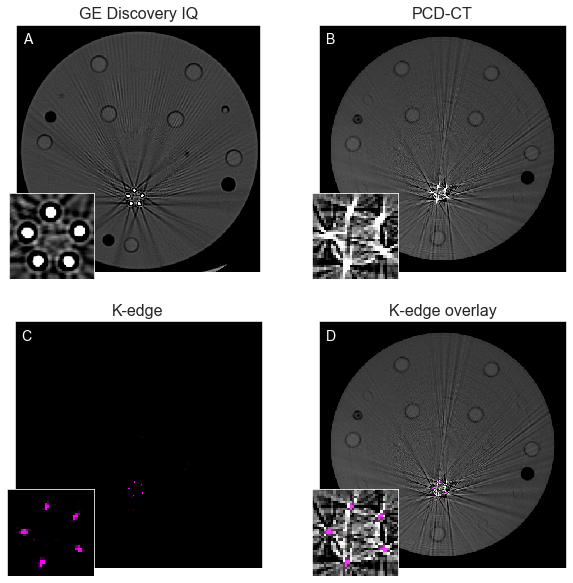

In [39]:

# K-edge image

# Figure comparing the K-edge to the clinical and the full-bin PCD CT
import os
import numpy as np
import pydicom as pyd
import matplotlib.pyplot as plt
from glob import glob
from natsort import natural_keys
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Type of acquisition folder
clin_dir = 'Clinical CT'
pcd_dir = 'LDA Data'

# Specific folder defining the day
clin_folder = '22_09_20_CT_stents'
pcd_folder = '22_10_11_CT_stents_heli'

append = ''

# Slice to show
pcd_slice = 4
clin_slice = 161

clin_path = os.path.join(directory, clin_dir, clin_folder, '10cm_phantom')
pcd_path = os.path.join(directory, pcd_dir, pcd_folder)

# Grab the PCD data and select the correct bin and slice
pink_pcd = np.load(os.path.join(pcd_path, 'purple_bottom', 'Norm CT', f'CT_FDK{append}.npy'))[-1, pcd_slice]
pink_kedge = np.load(os.path.join(pcd_path, 'purple_bottom', 'CT', f'KDA_FDK{append}.npy'))[pcd_slice]

# Organize the clinical files in numerical order
pink_clin_files = glob(os.path.join(clin_path, 'purple', 'Data', '*.dcm'))
pink_clin_files.sort(key=natural_keys)

# Select the correct slice in the clinical data
pink_clin = pyd.dcmread(pink_clin_files[clin_slice])

# Get the pixel and zoom in on the phantom (with scaling)
# pink_clin = np.array(pink_clin.pixel_array)[90:310, 140:360] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

pink_clin = np.array(pink_clin.pixel_array)[35:-35, 45:-30] * pink_clin.RescaleSlope + pink_clin.RescaleIntercept

# Create the colormaps
nbins = 100
c1 = (1, 0, 1)

black_val = 0
black_list = (black_val, black_val, black_val)

c1_rng = [black_list, c1]
cmap1 = colors.LinearSegmentedColormap.from_list('Purp', c1_rng, N=nbins)  # From black to purple

gray_val = 0.34
gray_list = (gray_val, gray_val, gray_val)

cmap2 = colors.LinearSegmentedColormap.from_list('1ab', [gray_list, c1], N=nbins)  # From gray to purple
cmap2.set_bad('white', alpha=0)
cmap2.set_over(c1, alpha=1)

# Set up the figure
kedge_fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

vmax = 1500
vmin = -600

ax[0, 0].imshow(np.fliplr(pink_clin), cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax00 = inset_axes(ax[0, 0], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 0].transAxes, loc=3)
ax00.set_xticks([])
ax00.set_yticks([])
ax00.imshow(np.fliplr(pink_clin[287:329, 204:246]), cmap='gray', vmin=vmin, vmax=vmax)

ax[0, 1].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax01 = inset_axes(ax[0, 1], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[0, 1].transAxes, loc=3)
ax01.set_xticks([])
ax01.set_yticks([])
ax01.imshow(pink_pcd[269:306, 187:224], cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')

ax[1, 0].imshow(pink_kedge, cmap=cmap1, vmin=0.001, vmax=0.006, interpolation='nearest')
ax10 = inset_axes(ax[1, 0], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 0].transAxes, loc=3)
ax10.set_xticks([])
ax10.set_yticks([])
ax10.imshow(pink_kedge[269:306, 187:224], cmap=cmap1, vmin=0.001, vmax=0.006, interpolation='nearest')

new_kedge = np.ones(np.shape(pink_kedge)) * np.nan
new_kedge[269:306, 187:224] = pink_kedge[269:306, 187:224]
new_kedge[new_kedge < 0.001] = np.nan


ax[1, 1].imshow(pink_pcd, cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax[1, 1].imshow(new_kedge, cmap=cmap1, vmin=0.001, vmax=0.006, interpolation='nearest', alpha=0.8)
ax11 = inset_axes(ax[1, 1], width="50%", height="50%", bbox_to_anchor=(-0.05, -0.05, .7, .7),
                   bbox_transform=ax[1, 1].transAxes, loc=3)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.imshow(pink_pcd[269:306, 187:224], cmap='gray', vmin=vmin, vmax=vmax, interpolation='nearest')
ax11.imshow(new_kedge[269:306, 187:224], cmap=cmap1, vmin=0.001, vmax=0.006, interpolation='nearest', alpha=0.8)

ax[0, 0].set_title('GE Discovery IQ', fontsize=16)
ax[0, 1].set_title('PCD-CT', fontsize=16)
ax[1, 0].set_title('K-edge', fontsize=16)
ax[1, 1].set_title('K-edge overlay', fontsize=16)

ax[0, 0].annotate('A', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[0, 1].annotate('B', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[1, 0].annotate('C', (7, 228), xycoords='axes points', color='white', fontsize=14)
ax[1, 1].annotate('D', (7, 228), xycoords='axes points', color='white', fontsize=14)

# plt.subplots_adjust(wspace=0.1)
# kedge_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\Kedge_fig{append}.png', dpi=500)
# kedge_fig.savefig(rf'D:\OneDrive - University of Victoria\Files\Grad School\Manuscripts\Stents\Figures_helical\Kedge_fig{append}.eps', dpi=500)
